# C22070780

In [1]:
# import libs

import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import metrics


# sn.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv("CW1_data_202223.csv")

In [3]:
df.head()

,id,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated,Result
0,332804,Female,39.0,1.0,15.0,0.0,1-2 Year,NaN,"£2,645.30",55,227,1
1,116249,Male,38.0,1.0,11.0,NaN,1-2 Year,NaN,"£1,151.90",26,29,0
2,255006,Male,22.0,1.0,30.0,NaN,< 1 Year,NaN,"£2,265.90",152,166,0
3,317475,Female,23.0,1.0,NaN,NaN,< 1 Year,NaN,"£1,456.60",151,277,0
4,344213,Male,56.0,1.0,48.0,0.0,> 2 Years,NaN,£131.50,154,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB


In [5]:
df.describe()

,id,Age,HasDrivingLicense,RegionID,Switch,SalesChannelID,DaysSinceCreated,Result
count,304887.000000,274339.000000,274399.000000,274334.000000,152557.000000,304887.000000,304887.000000,304887.000000
mean,190594.098072,38.832561,0.997853,26.408892,0.458281,111.966591,154.272609,0.121970
std,110022.144283,15.504062,0.046281,13.213345,0.498258,54.230069,83.642389,0.327251
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,95342.500000,25.000000,1.000000,15.000000,0.000000,26.000000,82.000000,0.000000
50%,190639.000000,36.000000,1.000000,28.000000,0.000000,131.000000,154.000000,0.000000
75%,285785.500000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,1.000000


In [6]:
df.isnull().sum()

id                        0
Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

In [7]:
df.Gender.value_counts()

Male      148391
Female    126069
Name: Gender, dtype: int64

In [8]:
df.Gender = df.Gender.fillna('idk')

<AxesSubplot:xlabel='Gender', ylabel='count'>

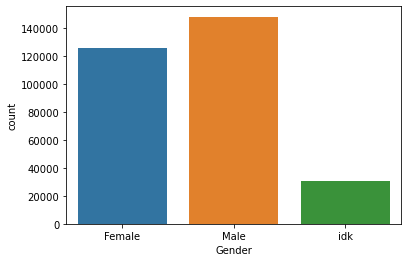

In [9]:
sns.countplot(x='Gender', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

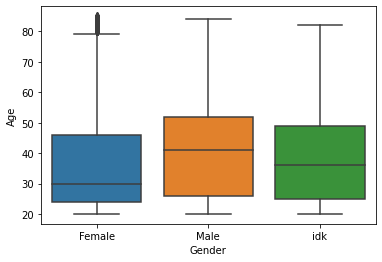

In [10]:
sns.boxplot(x = 'Gender', y = 'Age', data = df)

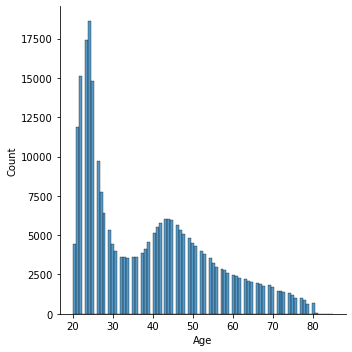

In [11]:
sns.displot(df.Age)

<AxesSubplot:xlabel='VehicleAge', ylabel='count'>

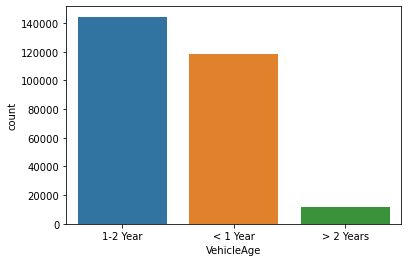

In [12]:
sns.countplot(x='VehicleAge', data=df)

<AxesSubplot:xlabel='HasDrivingLicense', ylabel='count'>

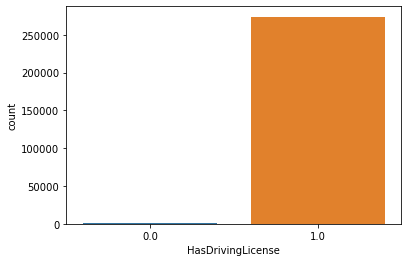

In [13]:
sns.countplot(x='HasDrivingLicense',data=df)

<AxesSubplot:xlabel='RegionID', ylabel='count'>

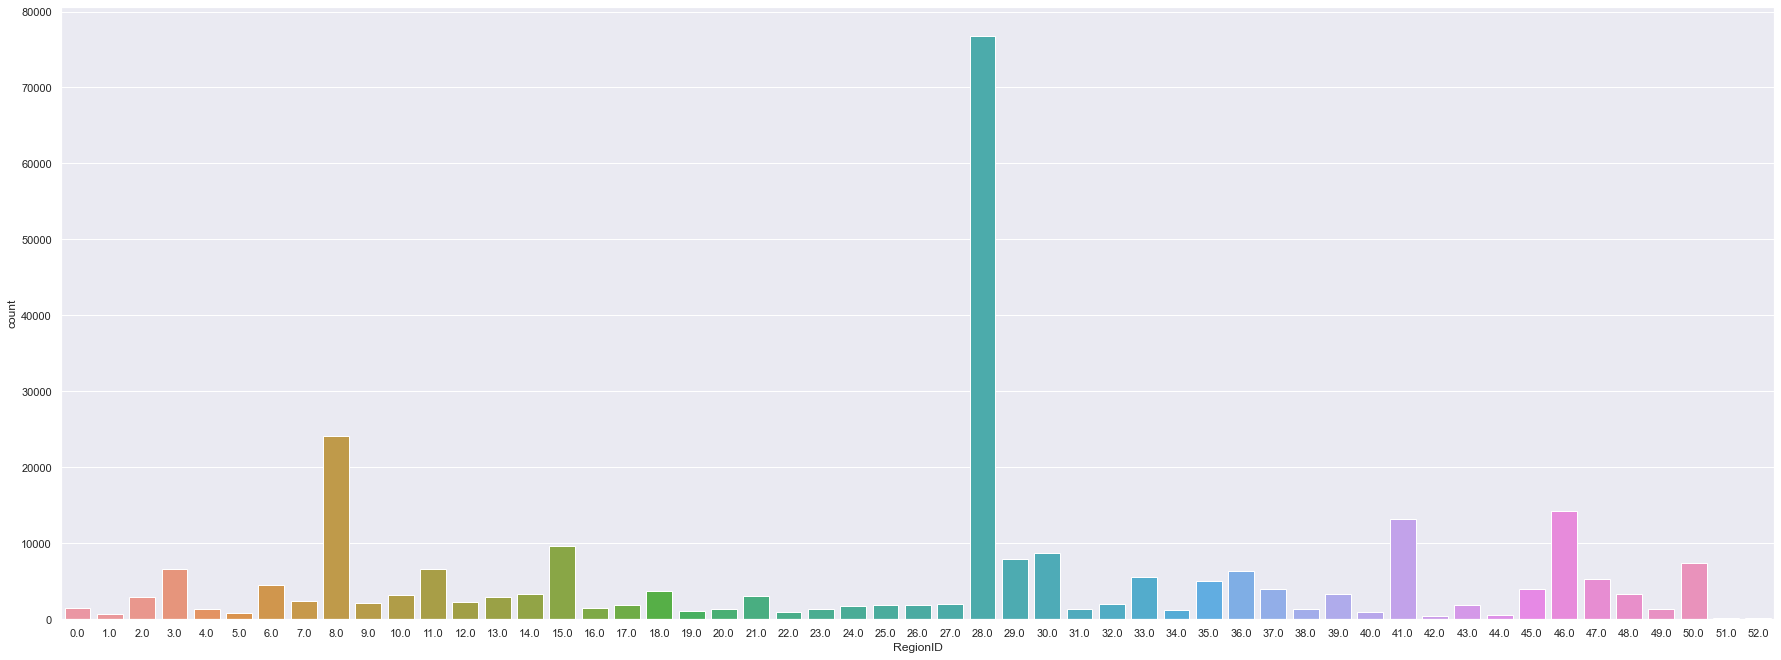

In [14]:
sns.set(rc={'figure.figsize':(30.7,11.27)})
sns.countplot(x='RegionID', data=df)

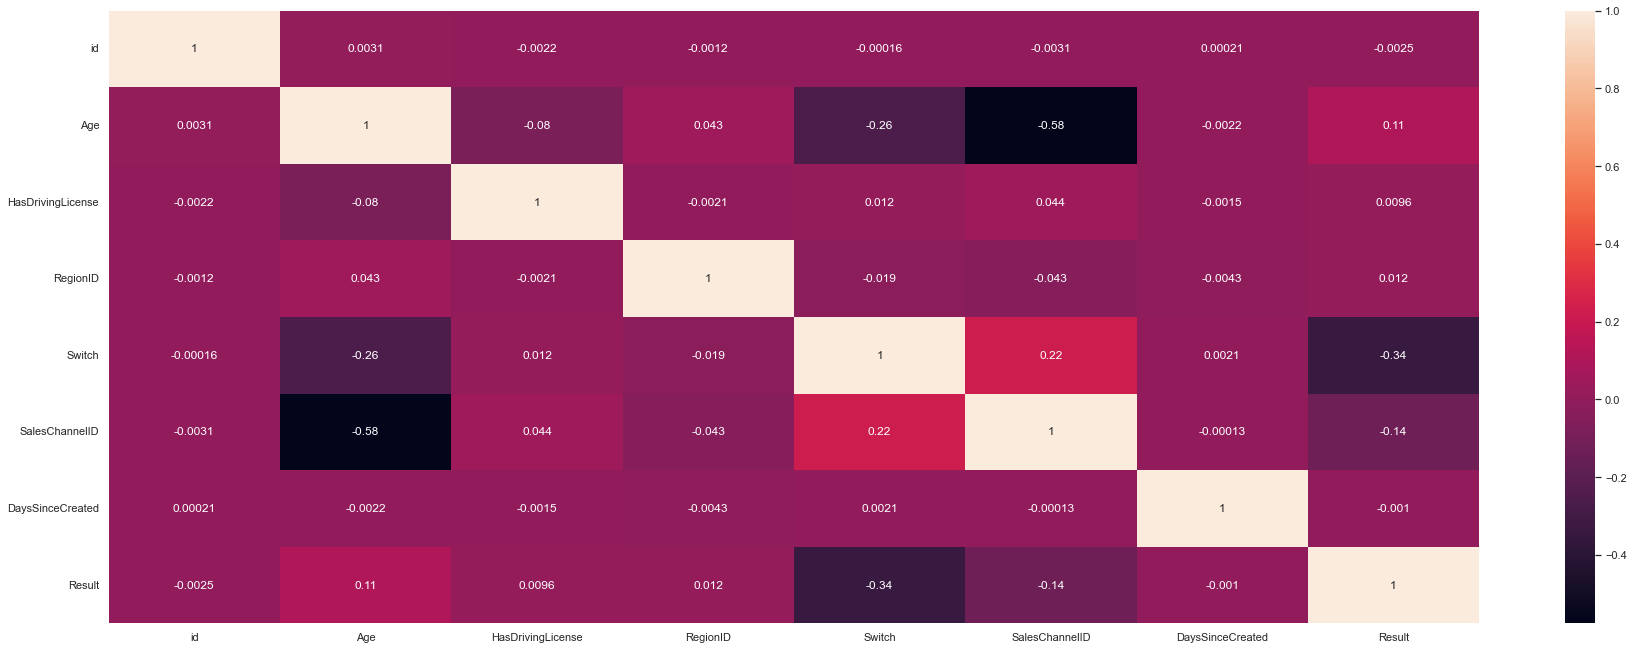

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
corr_matrix['Result'].sort_values(ascending = False)

Result               1.000000
Age                  0.111939
RegionID             0.011969
HasDrivingLicense    0.009580
DaysSinceCreated    -0.001025
id                  -0.002525
SalesChannelID      -0.137533
Switch              -0.337895
Name: Result, dtype: float64

<AxesSubplot:xlabel='PastAccident', ylabel='count'>

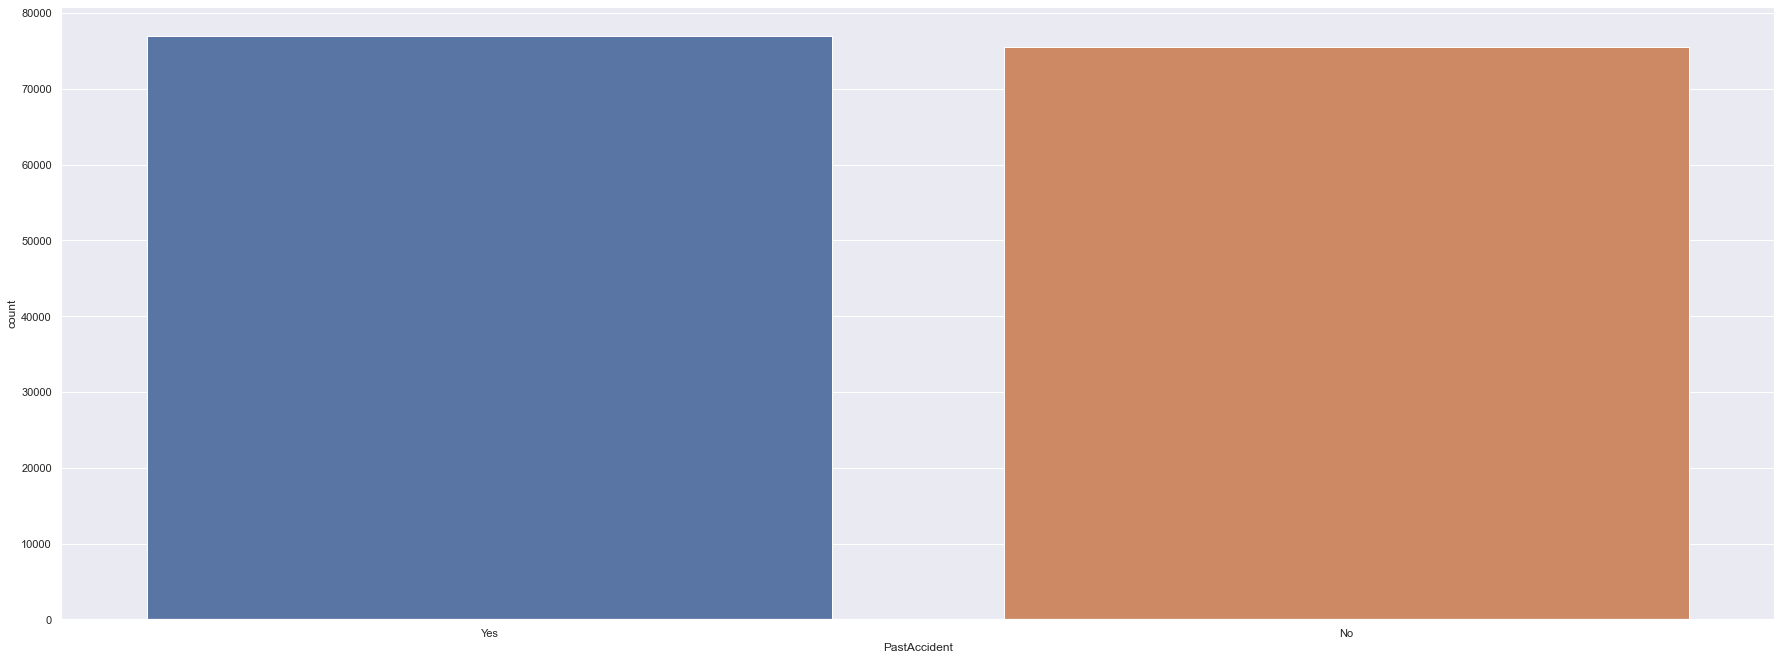

In [17]:
sns.countplot(x='PastAccident',data=df)

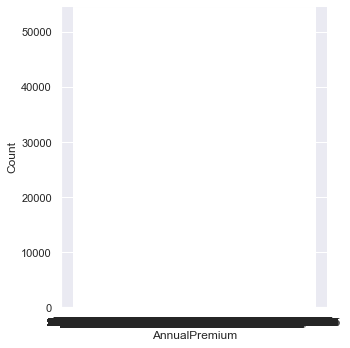

In [18]:
sns.displot(df.AnnualPremium)

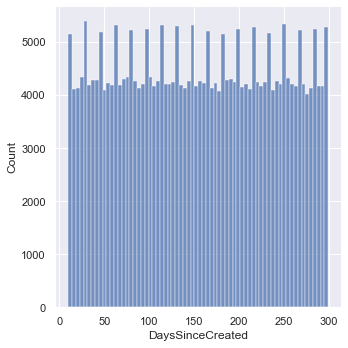

In [19]:
sns.displot(df.DaysSinceCreated)

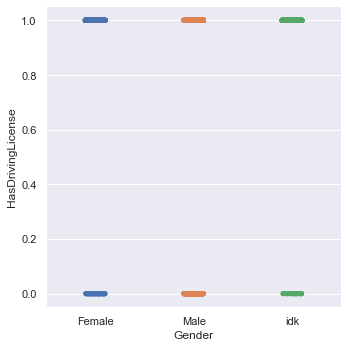

In [20]:
sns.catplot(data=df,x='Gender',y='HasDrivingLicense')

<AxesSubplot:xlabel='Age', ylabel='AnnualPremium'>

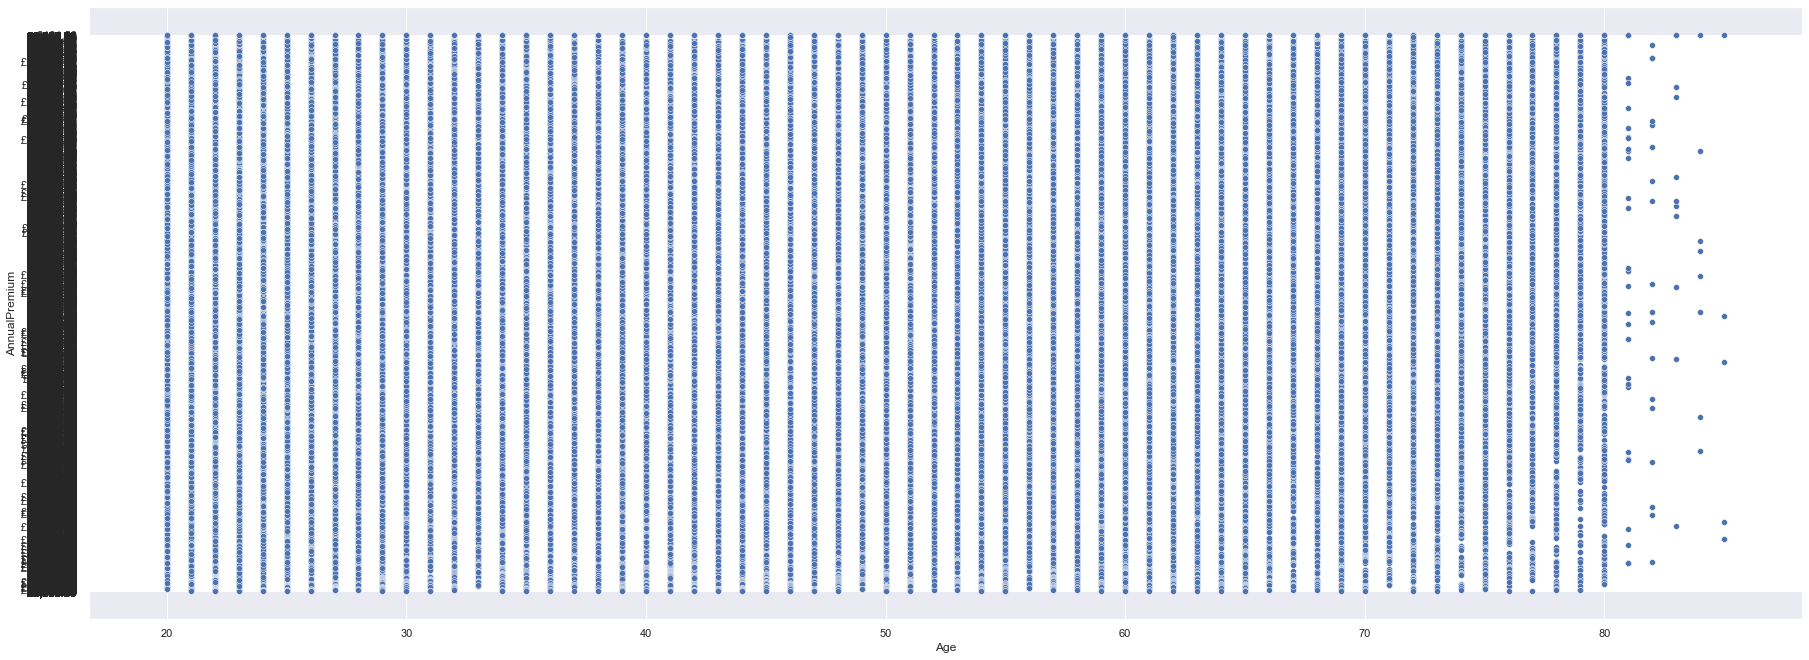

In [21]:
sns.scatterplot(x=df['Age'],y=df['AnnualPremium'])


<AxesSubplot:xlabel='Result', ylabel='count'>

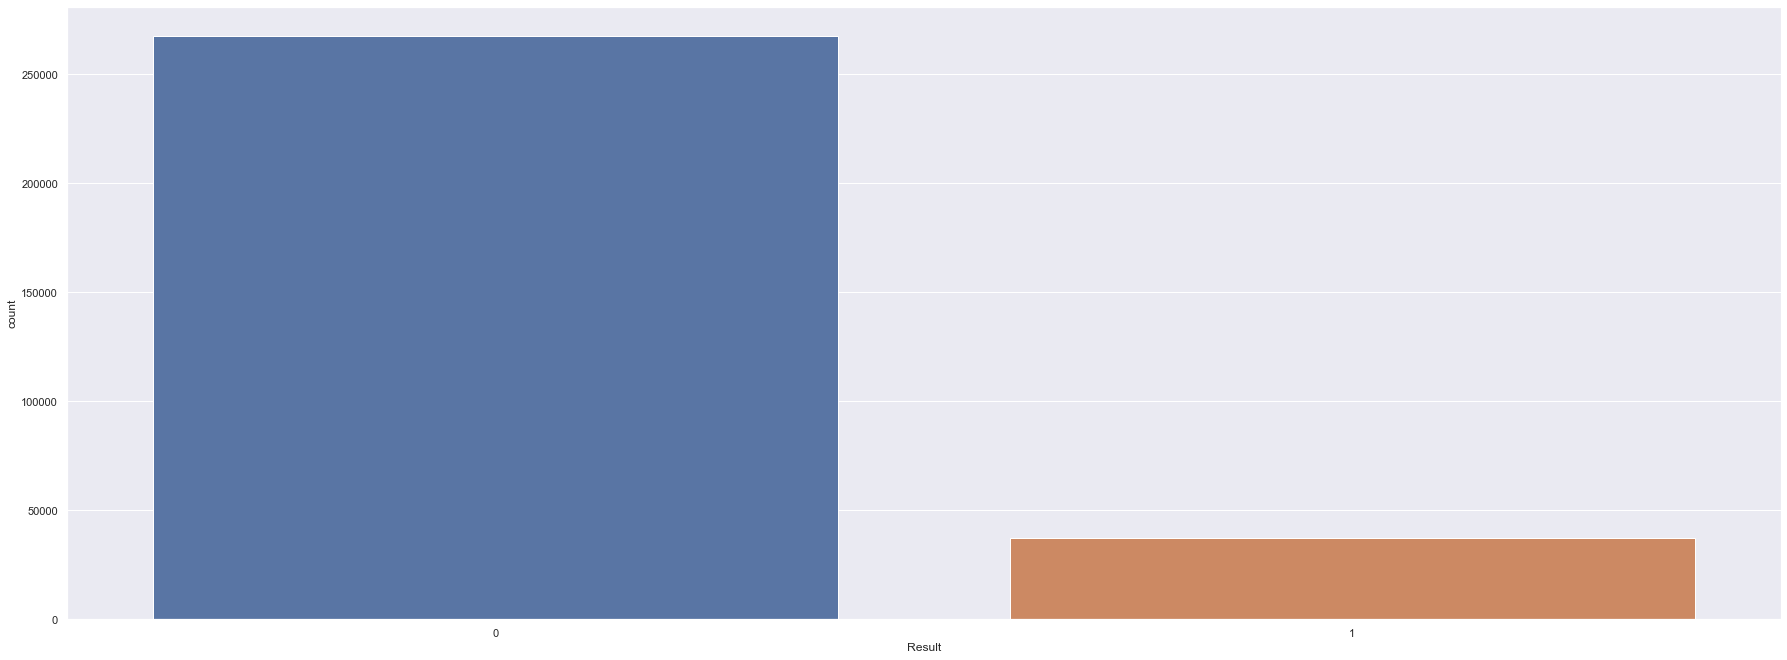

In [22]:
sns.countplot(x='Result',data=df)

# Data Preprocessing

In [23]:
nan_count_per_row = df.isnull().sum(axis=1).tolist()
index_to_be_deleted = [_ for _ in range(len(nan_count_per_row)) if nan_count_per_row[_] >=4 ]
df = df.drop(index=index_to_be_deleted)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300264 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 300264 non-null  int64  
 1   Gender             300264 non-null  object 
 2   Age                272276 non-null  float64
 3   HasDrivingLicense  272313 non-null  float64
 4   RegionID           272271 non-null  float64
 5   Switch             152285 non-null  float64
 6   VehicleAge         272287 non-null  object 
 7   PastAccident       152124 non-null  object 
 8   AnnualPremium      300264 non-null  object 
 9   SalesChannelID     300264 non-null  int64  
 10  DaysSinceCreated   300264 non-null  int64  
 11  Result             300264 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 29.8+ MB


In [24]:
df.isnull().sum()

id                        0
Gender                    0
Age                   27988
HasDrivingLicense     27951
RegionID              27993
Switch               147979
VehicleAge            27977
PastAccident         148140
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

In [25]:
male_df = df[df['Gender'] == "Male"]
female_df = df[df['Gender'] == "Female"]
idk_df = df[df['Gender'] == "idk"]

In [26]:
male_age_mean = int(male_df['Age'].mean())
female_age_mean = int(female_df['Age'].mean())
idk_age_mean = int(idk_df['Age'].mean())

for idx, row in df.iterrows():
    if  df.loc[idx,'Gender'] == "Male":
        df.loc[idx,'Age'] = male_age_mean
    elif  df.loc[idx,'Gender'] == "Female":
        df.loc[idx,'Age'] = female_age_mean
    elif  df.loc[idx,'Gender'] == "idk":
        df.loc[idx,'Age'] = idk_age_mean


In [27]:
df.HasDrivingLicense = df.HasDrivingLicense.fillna(-1)

male_df = df[df['Gender'] == "Male"]
female_df = df[df['Gender'] == "Female"]
idk_df = df[df['Gender'] == "idk"]

In [28]:
male_df.HasDrivingLicense.value_counts()

 1.0    132177
-1.0     13582
 0.0       409
Name: HasDrivingLicense, dtype: int64

In [29]:
female_df.HasDrivingLicense.value_counts()

 1.0    112373
-1.0     11629
 0.0       130
Name: HasDrivingLicense, dtype: int64

In [30]:
idk_df.HasDrivingLicense.value_counts()

 1.0    27177
-1.0     2740
 0.0       47
Name: HasDrivingLicense, dtype: int64

In [31]:
df.RegionID = df.RegionID.fillna(-1.0)

male_df = df[df['Gender'] == "Male"]
female_df = df[df['Gender'] == "Female"]
idk_df = df[df['Gender'] == "idk"]

In [32]:
df.Switch = df.Switch.fillna(-1.0)

male_df = df[df['Gender'] == "Male"]
female_df = df[df['Gender'] == "Female"]
idk_df = df[df['Gender'] == "idk"]

df.Switch.value_counts()

-1.0    147979
 0.0     82490
 1.0     69795
Name: Switch, dtype: int64

In [33]:
df.VehicleAge = df.VehicleAge.fillna('idk')

male_df = df[df['Gender'] == "Male"]
female_df = df[df['Gender'] == "Female"]
idk_df = df[df['Gender'] == "idk"]

df.VehicleAge.value_counts()

1-2 Year     143225
< 1 Year     117606
idk           27977
> 2 Years     11456
Name: VehicleAge, dtype: int64

In [34]:
df.PastAccident = df.PastAccident.fillna('idk')

male_df = df[df['Gender'] == "Male"]
female_df = df[df['Gender'] == "Female"]
idk_df = df[df['Gender'] == "idk"]

df.PastAccident.value_counts()

idk    148140
Yes     76829
No      75295
Name: PastAccident, dtype: int64

In [35]:
df['AnnualPremium'] = df['AnnualPremium'].apply(lambda x: float(x.replace("£","").replace(",","").strip()))


In [36]:
df.Age = df.Age.astype(int)
df.HasDrivingLicense = df.HasDrivingLicense.astype(int)
df.RegionID = df.RegionID.astype(int)
df.Switch = df.Switch.astype(int)


In [37]:
le = preprocessing.LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['VehicleAge']= le.fit_transform(df['VehicleAge'])
df['PastAccident'] = le.fit_transform(df['PastAccident'])

In [38]:
sc = preprocessing.StandardScaler()
df['AnnualPremium']= sc.fit_transform(df[['AnnualPremium']])
df['DaysSinceCreated']= sc.fit_transform(df[['DaysSinceCreated']])
df['Age']= sc.fit_transform(df[['Age']])

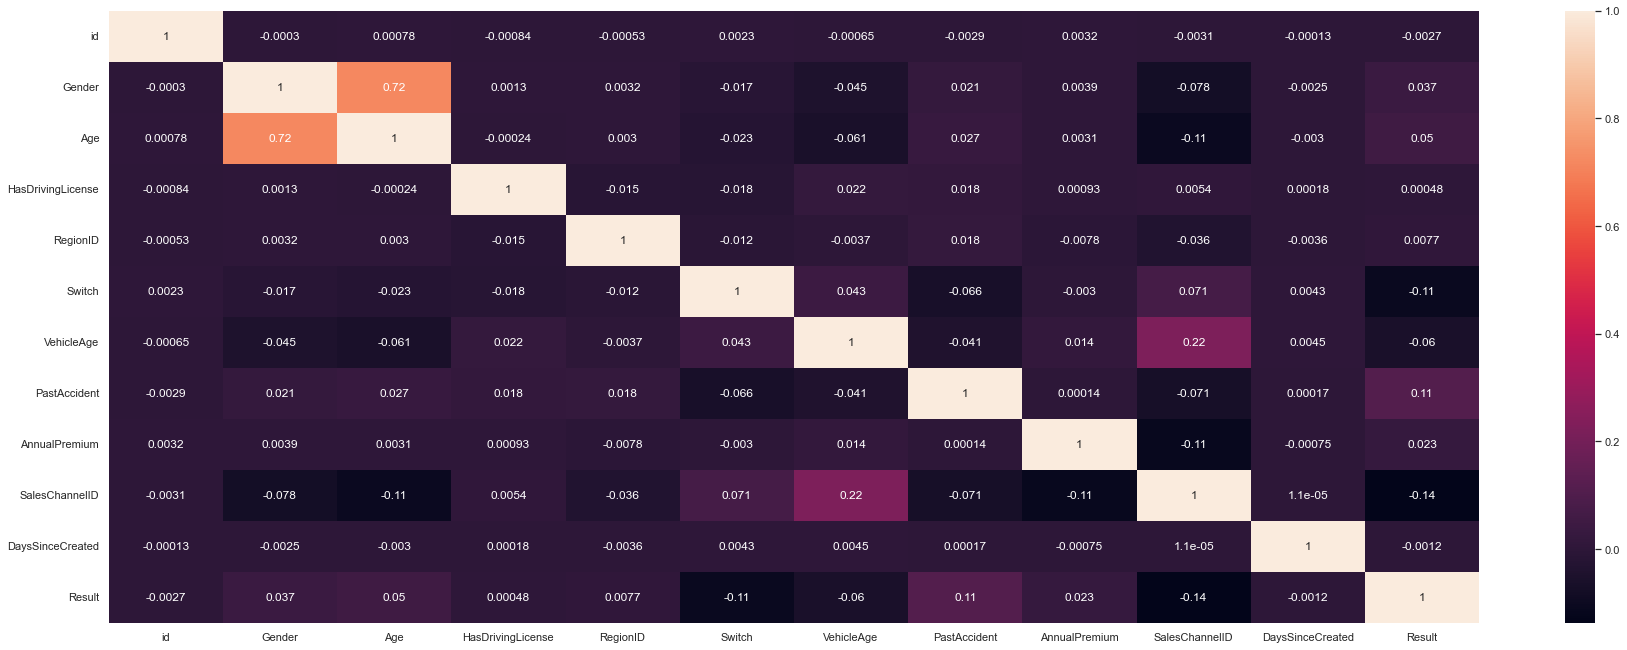

In [39]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Data Modeling and Evaluation

In [40]:
feature_names = ['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch', 'VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID', 'DaysSinceCreated']
X= df[feature_names]
y= df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify=y)

In [41]:
counter = Counter(y_train)
print(counter)

counter = Counter(y_test)
print(counter)

Counter({0: 184556, 1: 25628})
Counter({0: 79097, 1: 10983})


In [42]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print(counter)

oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train_smote)
print(counter)


Counter({0: 184556, 1: 25628})
Counter({0: 184556, 1: 184556})


In [43]:
counter = Counter(y_test)
print(counter)


Counter({0: 79097, 1: 10983})


ACCURACY OF THE MODEL:  0.7720803730017762

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     79097
           1       0.26      0.48      0.34     10983

    accuracy                           0.77     90080
   macro avg       0.59      0.65      0.60     90080
weighted avg       0.84      0.77      0.80     90080

Confusion matrix for Random Forest Classifier



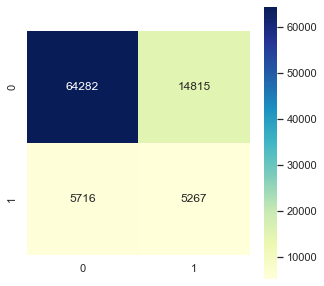

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix for Random Forest Classifier\n')
y_pred = clf.predict(X_test)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, square= True, cmap= 'YlGnBu',fmt='d')
plt.show()


In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6461288256873685

ACCURACY OF THE MODEL:  0.7196936056838366

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     79097
           1       0.24      0.58      0.34     10983

    accuracy                           0.72     90080
   macro avg       0.58      0.66      0.58     90080
weighted avg       0.84      0.72      0.76     90080

Confusion matrix for K Neighbors Classifier



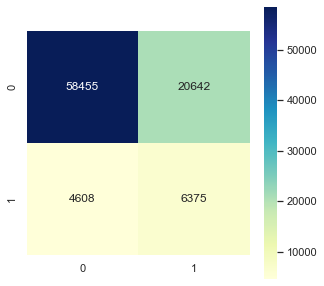

In [46]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix for K Neighbors Classifier\n')
y_pred = clf.predict(X_test)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, square= True, cmap= 'YlGnBu',fmt='d')
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6597358975975053

ACCURACY OF THE MODEL:  0.7563499111900532
              precision    recall  f1-score   support

           0       0.91      0.80      0.85     79097
           1       0.24      0.46      0.32     10983

    accuracy                           0.76     90080
   macro avg       0.58      0.63      0.58     90080
weighted avg       0.83      0.76      0.79     90080

Confusion matrix for Decision Tree Classifier



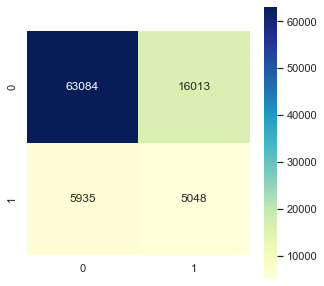

In [48]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train_smote, y_train_smote)
y_pred = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print('Confusion matrix for Decision Tree Classifier\n')
y_pred = clf.predict(X_test)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot= True, square= True, cmap= 'YlGnBu',fmt='d')
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.6285858921108846